In [20]:
#importar bibliotecas utiles. De no tenerse alguna (import not found) se debe instalar, generalmente con pip
import scipy.signal
from scipy.io import wavfile 
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd


#definicion de 3 bloques principales: TX, canal y RX

def transmisor(x_t):
    
    #x_t debe ser una lista con multiples array (caso de 3 señales) o una sola(caso del tono)
    
    
    #Su codigo para el transmisor va aca
    
    s_t=x_t[0] #eliminar cuando se tenga solucion propuesta
    
    return s_t #note que s_t es una unica señal utilizando un unico array, NO una lista

In [21]:
def receptor(s_t_prima,f_rf):
    
    # Note que f_rf es la frecuencia utilizada para la seleccionar la señal que se desea demodular
    
    #Su codigo para el receptor va aca  
       
    
    m_t_reconstruida=s_t_prima #eliminar cuando se tenga solucion propuesta
    
    #note que en el caso de multiples señales
    
    return m_t_reconstruida

In [22]:
def white_noise(s_t):
    mu=0
    sigma=0.1 * np.std(s_t)
    white_noise = np.random.normal(mu, sigma, s_t.shape[0])

    return white_noise

def canal(s_t):
    
    #Note que los parámetros mu (media) y sigma (desviacion) del ruido blanco Gaussiano deben cambiarse segun especificaciones
    canal_noise = white_noise(s_t)
    s_t_prima= canal_noise + s_t 
    
    return  s_t_prima

In [23]:
## Inicio de ejecucion ##
#Se da con ejemplo de tono, pasandolo por todo el sistema sin ningun cambio

#leer tono desde archivo
samplerate_tono, signal = wavfile.read("datos/vowel_1.wav")
#samplerate_tono, signal = wavfile.read("datos/vowel_1.wav")

#oir tono rescatado. Esta funcion sirve tambien como transductor de salida 
#Note la importancia de la frecuencia de muestreo (samplerate), la cual es diferente a la frecuencia fm del tono.
#sd.play(tono, samplerate_tono)

#graficar tono
#plt.plot(np.linspace(0., tono.shape[0] / samplerate_tono, tono.shape[0]),tono)
#plt.xlim([0, 0.01]) #mostrar solo parte de la onda

#agregar el tono a la lista X_t requerida por el transmisor
x_t=[]  #solo para ejemplo, crear lista con el mismo tono 3 veces
x_t.append(signal)
x_t.append(signal)
x_t.append(signal)
print("Se envia una lista con "+str(len(x_t))+" señales")

print("Samplerate")
print(samplerate_tono)
print("signal")
print(len(signal))



Se envia una lista con 3 señales
Samplerate
24000
signal
5286


(0.0, 0.01)

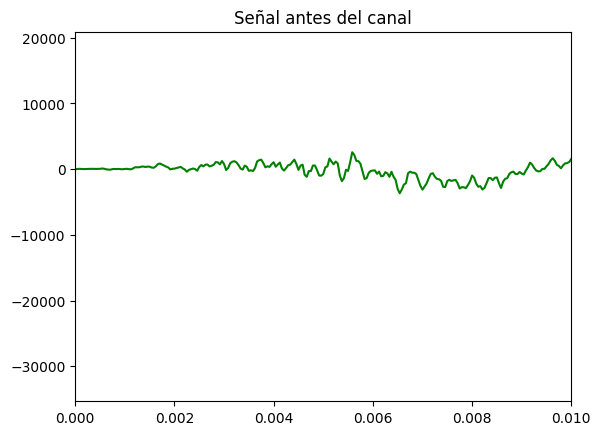

In [24]:
#llamar funcion de transmisor
s_t=transmisor(x_t)
time_signal = np.linspace(0., s_t.shape[0] / samplerate_tono, s_t.shape[0])
plt.title('Señal antes del canal')
plt.plot(time_signal, s_t,'g')
plt.xlim([0, 0.01])

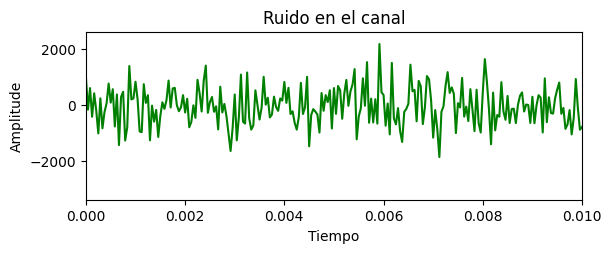

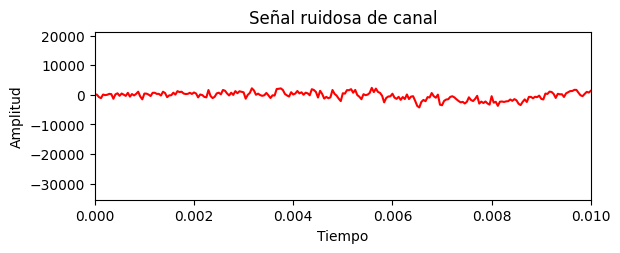

In [25]:
#llamar funcion que modela el canal
s_t_prima=canal(s_t)

time_signal = np.linspace(0., s_t_prima.shape[0] / samplerate_tono, s_t_prima.shape[0])
plt.subplot(2,1,1)
plt.title('Ruido en el canal')
plt.plot(time_signal, white_noise(s_t),'g')
plt.xlim([0, 0.01])
plt.ylabel('Amplitude')
plt.xlabel('Tiempo')
plt.show()


plt.subplot(2,1,2)
plt.plot(time_signal, s_t_prima,'r')
plt.xlim([0, 0.01])
plt.title("Señal ruidosa de canal")
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.show()

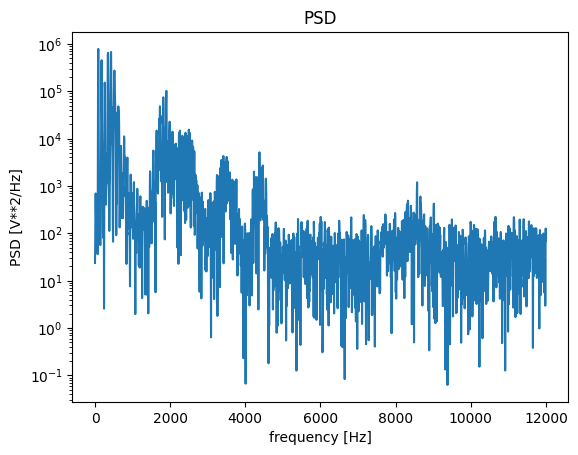

In [33]:
#Graficas en el dominio de la frecuencia para el canal

(f, S)= scipy.signal.welch(s_t_prima, samplerate_tono, nperseg=4*1024)

#plt.subplot(1,1,1)
plt.semilogy(f,S)
#plt.xlim([0,samplerate_tono/3])
plt.title("PSD")
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

(0.0, 0.01)

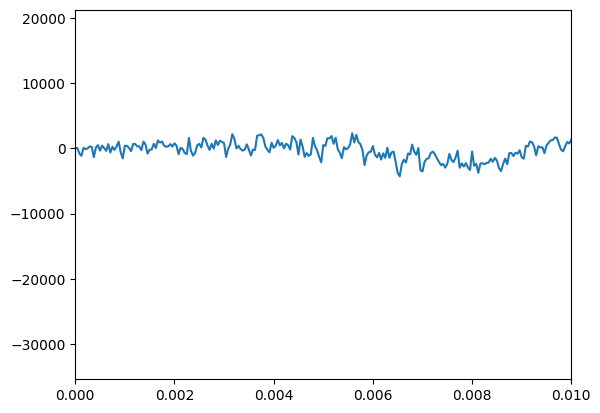

In [27]:
#llamar funcion de receptor
m_t_reconstruida=receptor(s_t_prima, samplerate_tono)

#graficar señal recibida
plt.plot(np.linspace(0., m_t_reconstruida.shape[0] / samplerate_tono, m_t_reconstruida.shape[0]),m_t_reconstruida)
plt.xlim([0, 0.01]) #mostrar solo parte de la onda
